In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"US/Eastern\"")

In [ ]:
hex_project_id = _hex_json.loads("\"cacb108a-8e0c-42e0-8106-63e56b74cf82\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Human_Trafficking_Models\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
data = pd.read_csv('Trafficking_cleaned.csv')
data = data.drop(['yearOfRegistration'], axis=1)
data

,citizenship,CountryOfExploitation,ageBroad,gender,tier,internal,enforcement,protectprogress,victimservices
0,USA,USA,0,1,1.0,1,2,1,-1
1,USA,USA,0,1,1.0,1,2,1,-1
2,USA,USA,0,1,1.0,1,2,1,-1
3,USA,USA,0,1,1.0,1,2,1,-1
4,USA,USA,0,1,1.0,1,2,1,-1
...,...,...,...,...,...,...,...,...,...
26027,IDN,HKG,0,1,2.0,1,1,1,-1
26028,IDN,HKG,0,1,2.0,1,1,1,-1
26029,IDN,HKG,0,1,2.0,1,1,1,-1
26030,IDN,HKG,0,1,2.0,1,1,1,-1


### Correlation Analysis

/tmp/ipykernel_12/1202848920.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="coolwarm", annot=True)


<Axes: >

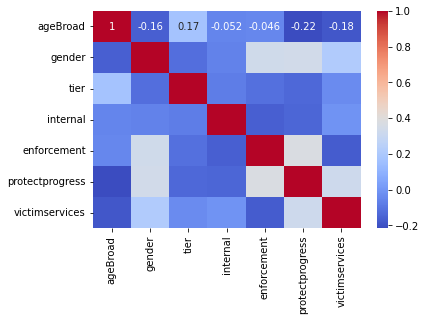

In [ ]:
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)

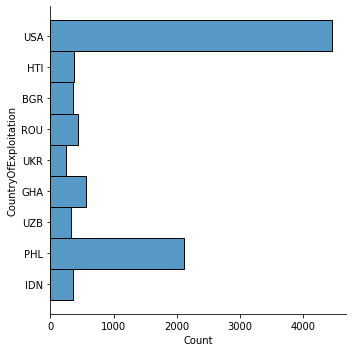

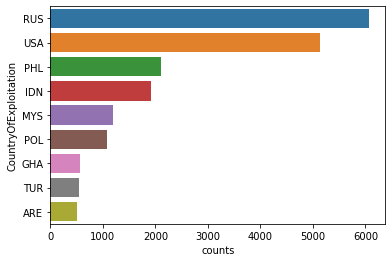

0.43035494775660726


In [ ]:
bar_data = data[data["citizenship"] == data["CountryOfExploitation"]]
bar_data = bar_data.groupby("CountryOfExploitation").filter(lambda x: len(x) >= 200)
sns.displot(bar_data, y="CountryOfExploitation")
plt.show()

bar_data = data["CountryOfExploitation"].value_counts().reset_index()
bar_data.columns = ["CountryOfExploitation", "counts"]
bar_data = bar_data[bar_data["counts"] >= 500]
sns.barplot(data=bar_data, x="counts", y="CountryOfExploitation")
plt.show()

print(
    data[
        (data["CountryOfExploitation"] == "USA")
        | (data["CountryOfExploitation"] == "RUS")
    ].size
    / data.size
)

In [ ]:
print(len(data[data['CountryOfExploitation'] == 'RUS']))

6072


### Rebalancing based on graphs

In [ ]:
# Separate the data into two groups: one for RUS and USA, and one for the rest
rus_usa = data[
    (data["CountryOfExploitation"] == "RUS") | (data["CountryOfExploitation"] == "USA")
]
other_countries = data[
    (data["CountryOfExploitation"] != "RUS") & (data["CountryOfExploitation"] != "USA")
]

# Upsample the 'other_countries' to match the number of samples in 'rus_usa'
upsampled_other_countries = resample(
    other_countries, replace=True, n_samples=rus_usa.shape[0], random_state=0
)

# Combine the upsampled data with the original RUS and USA data
data = pd.concat([rus_usa, upsampled_other_countries])

In [ ]:
print(len(data[data['CountryOfExploitation'] == 'RUS']))

6072


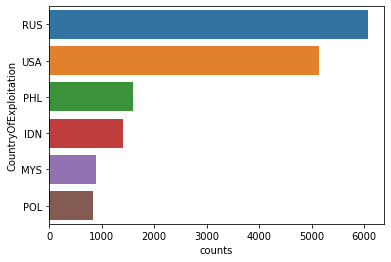

In [ ]:
bar_data = data["CountryOfExploitation"].value_counts().reset_index()
bar_data.columns = ["CountryOfExploitation", "counts"]
bar_data = bar_data[bar_data["counts"] >= 500]
sns.barplot(data=bar_data, x="counts", y="CountryOfExploitation")
plt.show()


### Train Test Splitting

In [ ]:
y = data["CountryOfExploitation"]
x = data.drop("CountryOfExploitation", axis=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=7)

In [ ]:
#Turning countries into dummy variables for the model
xtrain = pd.get_dummies(xtrain, columns=["citizenship"])
xtest = pd.get_dummies(xtest, columns=["citizenship"])
xtrain, xtest = xtrain.align(xtest, join="inner", axis=1)

xtrain

,ageBroad,gender,tier,internal,enforcement,protectprogress,victimservices,citizenship_AFG,citizenship_ALB,citizenship_BFA,...,citizenship_SLE,citizenship_SLV,citizenship_THA,citizenship_TJK,citizenship_TKM,citizenship_UGA,citizenship_UKR,citizenship_USA,citizenship_UZB,citizenship_VNM
15970,1,0,2.0,1,-1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4921,0,0,2.0,1,1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9918,7,1,2.0,1,1,-1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1349,0,1,1.0,1,2,1,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10234,7,0,2.0,1,1,-1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,2,1,1.0,1,2,1,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20354,7,0,2.0,1,1,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9060,5,1,2.0,1,2,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16517,7,1,2.0,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(xtrain, ytrain)
pred = dummy_clf.predict(xtest)
accuracy = accuracy_score(ytest, pred) * 100
report = classification_report(ytest, pred)
print("Accuracy for BaseLine is:", accuracy)
print("Report:")
print(report)

Accuracy for BaseLine is: 26.88531905399375
Report:
              precision    recall  f1-score   support

         AFG       0.00      0.00      0.00        26
         ALB       0.00      0.00      0.00        19
         ARE       0.00      0.00      0.00        77
         ARG       0.00      0.00      0.00        11
         AUT       0.00      0.00      0.00         9
         BGR       0.00      0.00      0.00        56
         BHR       0.00      0.00      0.00         4
         BIH       0.00      0.00      0.00        31
         BLR       0.00      0.00      0.00         8
         CHN       0.00      0.00      0.00        16
         CYP       0.00      0.00      0.00         4
         CZE       0.00      0.00      0.00        18
         DEU       0.00      0.00      0.00         4
         DNK       0.00      0.00      0.00         4
         ECU       0.00      0.00      0.00         1
         EGY       0.00      0.00      0.00         8
         ESP       0.00      

### Start of Modeling

In [ ]:
def xgBoost(xtrain, ytrain, xtest, ytest):
    le = LabelEncoder()
    y_train = le.fit_transform(ytrain)
    y_test = le.transform(ytest)

    xgb_model = XGBClassifier(booster="dart")
    xgb_model.fit(xtrain, y_train)           

    y_pred = xgb_model.predict(xtest)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")


# Call the function
# xgBoost(xtrain, ytrain, xtest, ytest)

In [ ]:
def DTtree(xtrain,ytrain,xtest,ytest):

    # Fit the Decision Tree Classifier
    dtc = DecisionTreeClassifier(random_state=0)
    dtc.fit(xtrain, ytrain)

    # Predict on the test set
    preds_p = dtc.predict_proba(xtest)
    preds = dtc.predict(xtest)
    # Calculate accuracy
    accuracy = accuracy_score(ytest, preds)
    print(f"Accuracy: {accuracy:.2f}")

    # Get feature importances
    importances = dtc.feature_importances_

    # Filter out features that include 'citizenship'
    non_citizenship_features = [col for col in xtrain.columns if 'citizenship' not in col]

    # Get the indices of non-citizenship features
    non_citizenship_indices = [xtrain.columns.get_loc(col) for col in non_citizenship_features]

    # Sort the feature importances for non-citizenship features in descending order
    non_citizenship_importances = importances[non_citizenship_indices]
    large_to_small_idx = np.argsort(non_citizenship_importances)[::1]

    # Plot the feature importances for non-citizenship features
    plt.figure(figsize=(20, 12))
    plt.title("Feature Importances (Excluding 'citizenship' Features)")
    plt.barh(range(len(non_citizenship_indices)), non_citizenship_importances[large_to_small_idx], align="center")
    plt.yticks(range(len(non_citizenship_indices)), np.array(non_citizenship_features)[large_to_small_idx])
    plt.xticks(fontsize=12)
    plt.ylim([-1, len(non_citizenship_indices)])
    plt.tight_layout()
    plt.show()

    return preds, preds_p

In [ ]:
def RfTree(xtrain,ytrain,xtest,ytest):

    # Create the model
    rf_clf = RandomForestClassifier(random_state=42)

    # Fit the model
    rf_clf.fit(xtrain, ytrain)

    # Make predictions
    rf_preds_p = rf_clf.predict_proba(xtest)
    rf_preds = rf_clf.predict(xtest)
    # Calculate accuracy
    rf_accuracy = accuracy_score(ytest, rf_preds)
    print(f"Random Forest accuracy: {rf_accuracy:.2f}")
    
    return rf_preds, rf_preds_p

In [ ]:
from sklearn.svm import SVC


def svm_model_fit_predict(x_train, y_train, x_test, y_test):
    svm_model = SVC()
    svm_model.fit(x_train, y_train)
    svm_predictions = svm_model.predict(x_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_report = classification_report(y_test, svm_predictions)
    return svm_accuracy, svm_report


# Example of how to use the function
#svm_accuracy, svm_report = svm_model_fit_predict(xtrain, ytrain, xtest, ytest)
# print(svm_accuracy)
#print(svm_report)

In [ ]:

def NNCV(xtrain,ytrain,xtest,ytest):

    # Parameter tuning
    # NN modeling
    nn_classifier = MLPClassifier()
    parameters = {
        "hidden_layer_sizes": [
            (10,),
            (20,),
            (30,),
            (40,),
            (50,),
            (60,),
            (70,),
            (80,),
            (90,),
            (100,),
        ],
        "activation": ["identity", "logistic", "tanh", "relu"],
        "learning_rate": ["constant", "invscaling", "adaptive"],
    }
    clf = GridSearchCV(nn_classifier, parameters, n_jobs=-1, cv=2)
    clf.fit(xtrain, ytrain)
    #Checking which paramters scored the best
    print('Best parameters found:\n', clf.best_params_)
    y_true, y_pred = ytest , clf.predict(xtest)
    print('Results on the test set:')
    print(classification_report(y_true, y_pred))

In [ ]:
def NN(xtrain,ytrain,xtest,ytest):

    # NN training with best paramters
    nn_classifier = MLPClassifier(
        activation='tanh', 
        hidden_layer_sizes=(40,), 
        learning_rate='adaptive'
        )
    nn_classifier.fit(xtrain, ytrain)
    #NN predictions
    pred = nn_classifier.predict(xtest)
    pred_p = nn_classifier.predict_proba(xtest)
    accuracy = accuracy_score(ytest,pred)*100
    report = classification_report(ytest, pred)
    print("Accuracy for Neural Network is:",accuracy)
    print("Report:")
    print(report)

    return pred, pred_p

In [ ]:
#NNCV(xtrain,ytrain,xtest,ytest)

In [ ]:
preds, pred_p = NN(xtrain,ytrain,xtest,ytest)
preds

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
Accuracy for Neural Network is: 80.92369477911646
Report:
              precision    recall  f1-score   support

         AFG       0.96      0.96      0.96        26
         ALB       1.00      0.58      0.73        19
         ARE       0.26      0.06      0.10        77
         ARG       1.00      1.00      1.00        11
         AUT       0.00      0.00      0.00         9
         BGR       1.00      0.93      0.96        56
         BHR       0.00      0.00      0.00         4
         BIH       0.78      0.68      0.72        31
         BLR       1.00      0.75      0.86         8
         CHN       0.50      0.88      0.64        16
         CYP       0.67      0.50      0.57         4
     

array(['RUS', 'RUS', 'PHL', ..., 'PHL', 'MYS', 'PHL'], dtype='<U3')

Independent ROC and AUC per variable chosen



In [ ]:
def one_vs_rest(ytrain, ytest, pred_p, class_of_interest):
    label_binarizer = LabelBinarizer().fit(ytrain)
    y_onehot_test = label_binarizer.transform(ytest)
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    pred_p[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
        )
    _ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves",
    )



ROC and AUC micro averaged



In [ ]:
def roc_auc(ytrain, ytest, pred_p, title):
    label_binarizer = LabelBinarizer()
    y_onehot_train = label_binarizer.fit_transform(ytrain)
    y_onehot_test = label_binarizer.transform(ytest)

    display = RocCurveDisplay.from_predictions(
        y_onehot_test.ravel(),
        pred_p.ravel(),
        name="micro-average OvR",
        color="darkorange",
    )
    _ = display.ax_.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic for" + title,
    )
    micro_auc = roc_auc_score(
        y_onehot_test,
        pred_p,
        multi_class="ovr",
        average="micro",
    )
    return micro_auc




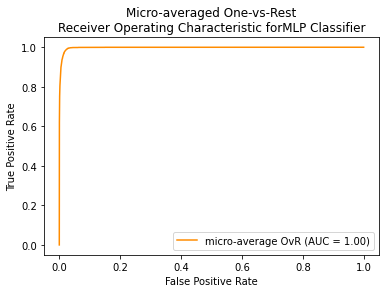

In [ ]:
NN_Micro_auc = roc_auc(ytrain, ytest, pred_p, 'MLP Classifier')

Accuracy: 0.81


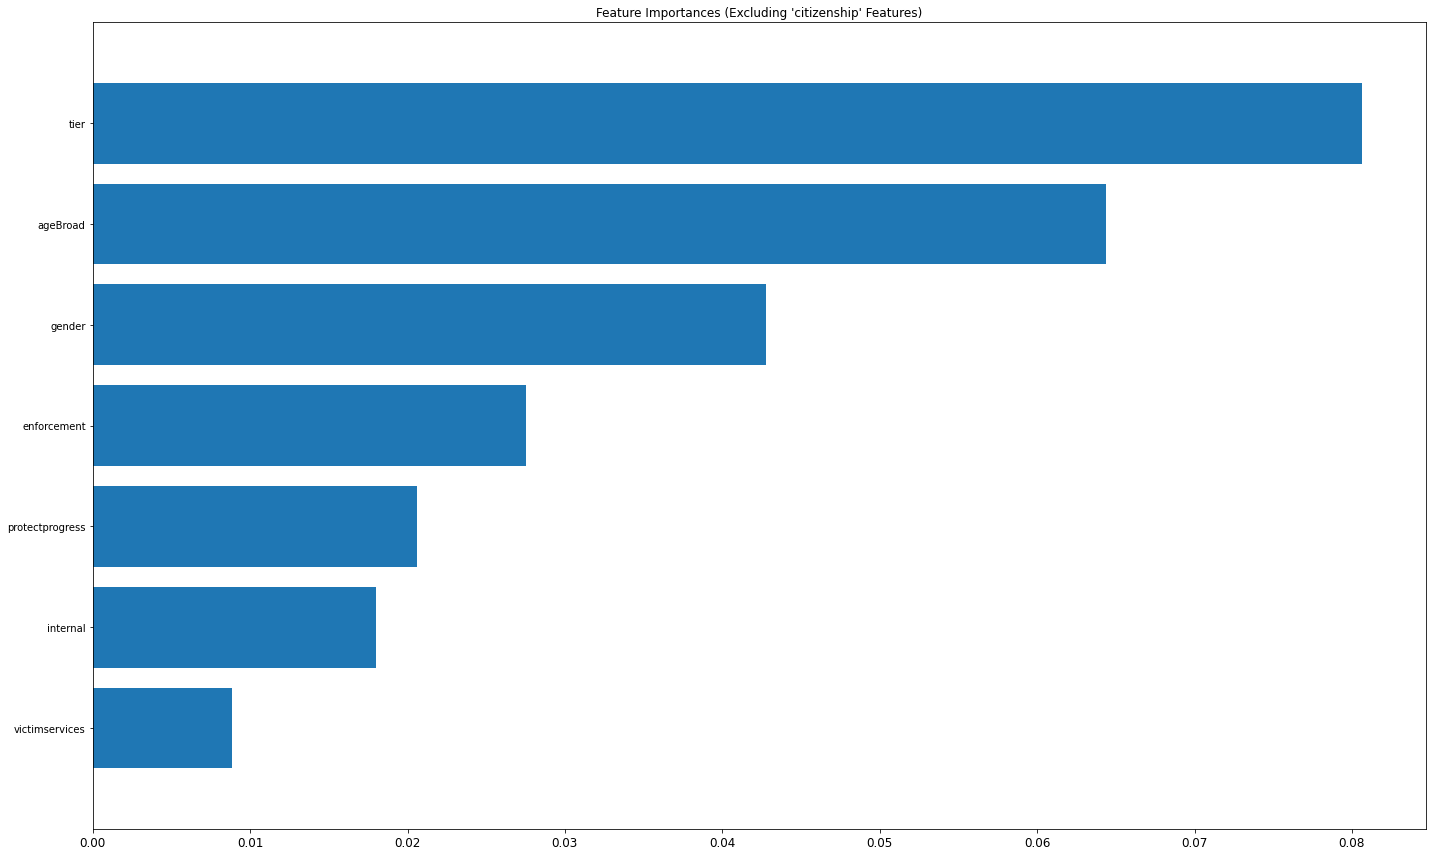

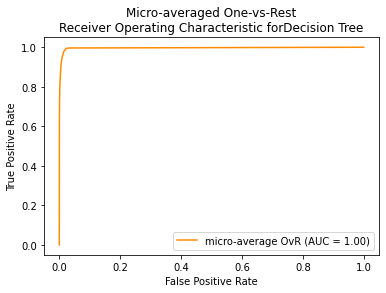

In [ ]:
dt_preds, dt_pred_p = DTtree(xtrain,ytrain,xtest,ytest)
DT_Micro_auc = roc_auc(ytrain, ytest, dt_pred_p, "Decision Tree")

In [ ]:
f1_score(ytest, pred, average='micro')

0.2688531905399375